# Lab 7 - Inference

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Bayesian Inference

Really, there are only a few classical problems in statistical inference. However, we use the Bayes Theorem as the basis for solving all of them:

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

You only need to identify what $H$ relates to...what is it? Is it some parameter of a distribution? Some property of a model (coefficients, error rate, etc.). For some formulations, we are more specific and specify $H$ as some parameter or parameters, $\theta$:

$$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}$$

In the text we saw how we could estimate the posterior distribution using four methods: Grid, Exact, Monte Carlo and Bootstrap. For this Lab, we'll concentrate on the Bootstrap method for the reasons specified in the text.

## Statistical inference of a proportion in a Bernoulli Trial

**1\. Suppose we have a coin that shows up heads 60% of the time ($\theta=p=0.6$). Generate 100 observations from this Binomial distribution (either as True/False or 1/0).** (This is just one way of generating synthetic data but a typical one: pick parameters for a distribution and then generate values from that distribution at random).

In [3]:
np.random.seed([1244875])

theta = 0.6
data = [1 if np.random.rand() < theta else 0 for _ in range( 100)]
print( data[0:20])

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


This is the synthetic data. At this point, we pretend that this is data we collected from the real world and we have no idea what $\theta$ really is.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This messes people up all the time. There is a difference between:</p>
    <p><tt>data = [1 if np.random.rand() &lt; 0.6 else 0 for _ in range( 100)]</tt></p>
    <p>which is generating random data (or "synthetic data" or "pseudo data" or "fake data") based on a desired unobserved parameter and...</p>
    <p>recreating a data set (or variable) of boolean outcomes which would be:</p>
    <p><tt>data = [1] * 60 + [0] * 40</tt></p>
    <p><strong>be very, very careful that you're using the right one at the right time. If you just need to create some random data, you can use the first. If you need to re-create an actual data set or create a data set with a precise parameterization, use the second.</strong></p>
</div>



Understanding that inference is not certain, our goal is to make inferences about this parameter's value using this data we just "collected." Normally, the first thing we do is just calculate the parameter from our data. An *estimate* of some real world parameter is often given a "hat", for example $\theta$ becomes $\hat{\theta}$. Sometimes, it goes from Greek to Latin as in $\sigma$ to $s$ and sometimes it gets an adornment as well as in $\mu$ to $\bar{x}$.

**2\. Calculate $\hat{theta}$.**

In [4]:
theta_est = np.mean( data)
print( theta_est)

0.67


But we know that this $\hat{\theta}$ is not necessarily the "true" value. We want to know all the values that are supported by the data we collected and the degree to which they are supported...how confident we are in them. This is basically what we get when we calculate a posterior distribution over $\theta$ based on the data.

And this is where the **(Non-Parameteric Bayesian) Bootstrap** estimate of that posterior distribution comes in. In the text we established *theoretically* how we went from a single data set to an estimate of the posterior distribution of our parameters. Now we're going to do it for reals.  Use the data we have to "bootstrap" an estimate of the posterior probability distribution over $\theta$, $P(\theta|D)$ which is "given the data we observed, how much are we to believe in the various values of $\theta$ and how much should we believe in them?" Remember that belief is quantified as probability.

**3\. Generate the Bootstrap of the posterior distribution of $\hat{\theta}$ and answer the following questions:**

First, we write a simple function to do our bootstrap sampling for us. It takes the data, a metric function and the number of bootstrap samples as the arguments. A metric function can be anything we like but it will most likely be something like `np.mean`, `np.var`, etc., it is whatever function we use to calculate our parameter/statistics.

In [7]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

Now we used the function by supplying the data we "collected", our metric function `np.mean` and indicate we want 1000 bootstrap samples. This returns the data we can use as our posterior distribution of the proportion.

In [6]:
posterior = bootstrap_sample( data, np.mean, 1000)

If we like, we can plot a histogram of this posterior distribution:

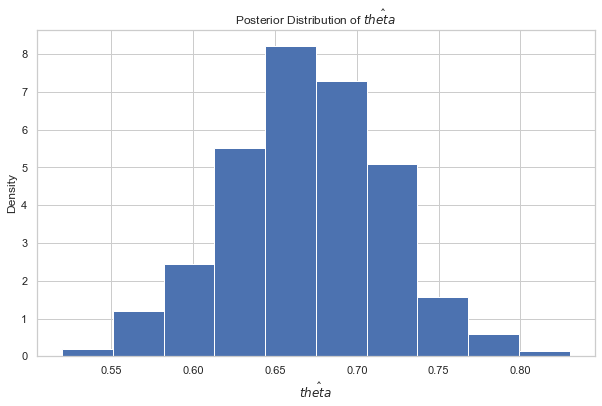

In [7]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of $\hat{theta}$")

plt.show()
plt.close()

Note that while the data is discrete and boolean (true/false), the parameter $\theta$ is continuous. You might also notice that our distribution appears to be normally distributed. Based on the Central Limit Theorem, this is what we'd expect.

**4\. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$? Interpret it.**

Although we'll often plot the posterior distribution, the real payoff from having it is to be able to do computations with it. There are a number of functions we can use for that purpose, for example, `mquantiles`. `mquantiles` is normally used to summarize the distributions of data but in this case, our data is estimates of $\theta$.

In [8]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([0.59, 0.74])

An important part of Data Science and assignments in this course is interpreting the results. This is not purely a coding class. Therefore, you should always, *always* interpret your results:

There is a 90% probability that the value of $\theta$ is between 0.59 and 0.74 based on the data.

Of course, there's nothing magical about only looking at the 90% confidence/credible interval and you can look at other ranges of interest as well.

**5\. In Bayesian Statistics, we often identify a range of possible values for a parameter that we consider the same. This is known as the ROPE (Region of Practical Equivalance). We know that a fair coin would have $\theta$ of 0.5 but we're unlikely to get an exact value of 0.5 from our data. If the ROPE is 0.48-0.52, what is the probability that our coin's $\theta$ lies in that range and is thus "fair"?**

In [9]:
np.mean((0.48 <= posterior) & (posterior <= 0.52))

0.002

One of the downsides to the Boostrap approach is that we do not follow "Cromwell's Dictum" and we can get events with zero probability. We should just interpret these events are really have very small probabilities.

Of course, now that we have this posterior distribution we can answer all kinds of (possibly) interesting and relevant questions to our problem. Let's stick with the basics, for now.

## Exercises

**Exercise 1.**

**Learning Objective: apply the Bootstrap to a realistic problem. For additional examples, refer to the Applications section of the Inference chapter in *Fundamentals*.**

In addition to estimates of the posterior distribution of parameters such as $\theta$, we are often interested in the posterior distribution of the *difference* of two $\theta$s. For example, we might be interested in the *difference* between the proportion of men who smoke ($\theta_{men}$) and the proportion of women who smoke ($\theta_{women}$). Using the Non-Parametric Bootstrap, we can generate posterior distributions for $\hat{\theta}_{men}$ and $\hat{\theta}_{women}$ as well as $d$, the *difference*.

These are the steps:

1. In the example above, we made up the data. However, if $\theta_{men}$ = 0.23 and $\theta_{women}$ = 0.34 and there were 100 observations each, we can re-create the actual samples. Re-create the actual samples.
2. Generate the bootstrap samples for each group.
3. Generate difference data. You can do this by simply subtracting, element by element, one bootstrap sample from the other, $\theta_{men}$ - $\theta_{women}$. (Why?)
4. Plot the distributions of all three.
5. Calculate the 90% Bayesian Confidence Interval of all three **and interpret them**.
6. Determine a ROPE for the difference and tell me what's the probability that the "true" value of the difference falls in the ROPE.

Use as many Markdown Cells and Code Cells as you need; it should look nice (not like a ransom note).

1. We have 2 separate distributions here, one for men and one for women. We will assign people who smoke as a value of 1, and non-smokers as a value of 0 in each case. Let's start by recreating the actual samples:

In [5]:
men = [1] * 23 + [0] * 77
women = [1] * 34 + [0] * 66

100

2. Next we will generate the bootstrap samples for each group using 1000 samples and the `boostrap_sample` function provided:

In [8]:
men_posterior = bootstrap_sample(men, np.mean, 1000)
women_posterior = bootstrap_sample(women, np.mean, 1000)

3. Next we generate the difference between men and women, which we can do with the vectorized np arrays: 

In [10]:
difference = men_posterior - women_posterior
posteriors = [men_posterior, women_posterior, difference]

4. Now we can plot all 3 of these histograms:

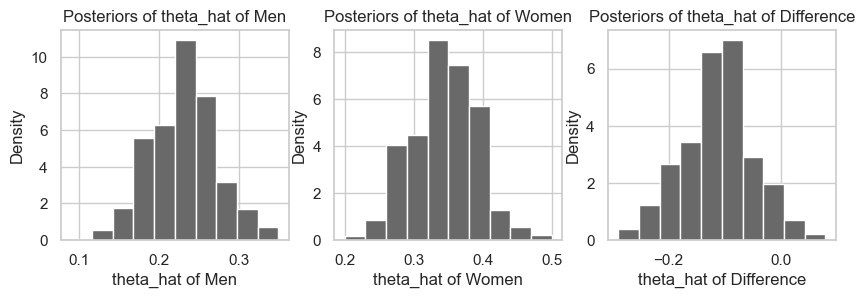

In [21]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
titles = ['Men', 'Women', 'Difference']

for i,x in enumerate(posteriors):
    axes = figure.add_subplot(2, 3, i + 1)
    
    axes.hist(x, density=True, color='dimgray')
    axes.set_ylabel( "Density")
    axes.set_xlabel( f"theta_hat of {titles[i]}")
    axes.set_title( f"Posteriors of theta_hat of {titles[i]}")

plt.show()
plt.close()

We see fairly symmetric distributions for all 3 of these histograms.

5. Now we calculate 90% Bayesian Confidence Interval and interpret each one:

In [22]:
stats.mstats.mquantiles(men_posterior, [0.05, 0.95])

array([0.16, 0.3 ])

So this shows us that there is a 90% chance that the value of $\theta_{men}$ is between 0.16 and 0.30 based on this data.

Similarly for women:

In [23]:
stats.mstats.mquantiles(women_posterior, [0.05, 0.95])

array([0.27, 0.42])

We find a 90% probability the value of $\theta_{women}$ is between 0.27 and 0.42, based on the data.

Lastly the difference:

In [24]:
stats.mstats.mquantiles(difference, [0.05, 0.95])

array([-0.22, -0.01])

The difference between men and women who smoke ($d$) has a 90% probability to be between -0.22 and -0.01

6. Finally let's determine a ROPE for the difference, and say that there should be about a 10% difference between women and men who smoke (d = -0.10). We can create a ROPE of -0.12 to -0.08.

Then, the probability that the true value of the difference falls between the ROPE is:

In [33]:
np.mean((-0.12 <= difference) & (difference <= -0.08))

0.29

We get about a 29% probability that the true value of the difference lies between the ROPE (-0.12 to -0.08).

The basic idea of using bootstrap sampling to estimate a posteriod distribution will stay with us throughout the entire semester. This will be our fundamental approach to statistical inference (there are other approaches and there are other *Bayesian* approaches). The important thing is to understand 1. why and 2. the dimensions along which the problems can vary such as,

1. The nature of data. The data may take on a variety of different types. We've looked primarily at boolean or Bernoulli data. However, the data might be categorical (more than two discrete outcomes), counts, real valued, etc. This means that there may be more than one $\theta$. For example, the normal distribution has two $\theta$s: the mean, $\mu$, and the variance, $\sigma^2$. But you should think even more broadly than this. A linear regression as many $\theta$s: the coefficients, the coefficient of determination, the error of the regression, etc. A decision tree has a structure and error rate.
2. A related concept is variability. We may have two true values, 0.23 and 0.24, but the variability of the data may not permit us to distinguish between them.
3. Another dimension is the amount of data. We may not be able to get a "good" inference because we have not collected enough data.

And, of course, all of these will and do interact. And a lot of experimental design is based on trying to limit variability (by "holding other things constant") and to get the "right" amount of data to support the inference we want to make.

These exercises investigate some of the dimensions.

**Exercise 2**

**Learning Objective: peek under the covers of the Bootstrap and see how different factors influence our inferences.**

**1\. Repeat the guided example (coin flips) with a $\theta = 0.05$ and discuss. Were the credible intervals the same size? Was your estimate of $\theta$ as good? What does this say about statistical inference on relatively rare events or extreme values?**

**Statistical Inference for a single real valued $\theta$**

**Exercise 3**

We can do the same thing for a real valued data (like weights, heights, etc.) and the $\theta$'s that describe such distributions. If we have a normal distribution, there are two such $\theta$s, $\mu$, the mean, and $\sigma$, the standard deviation. Remember, however, that we often think of the dispersion of our data as a percent of the mean or the *coefficient of variation*, v, the standard deviation over the mean ("variation as a percent of the mean").

$$v = s/\bar{x}$$

for the following problems, you're going to think in terms of $v$ and solve for the right $s$ to use.

**a\. Generate 50 observations from a normal distribution with $\mu=102.7$ and $v=5\%$.**

You should refer to the previous Lab for generating synthetic data from the normal distribution and working with $v$, the coefficient of variation.

In [10]:
np.random.seed([2386431651])

**b. What is $\bar{x}$?**

**c. Generate the Bootstrap estimate of the posterior distribution of $\bar{x}$.**

**d. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

**e. Define a ROPE of "about 100". What is the probability that $\bar{x}$ falls within the ROPE?.**

**Exercise 4\. Repeat Steps #1-5 with $v=25\%$.**

In [11]:
np.random.seed([484716248])

**Exercise 5\. Repeat Steps #1-5 with $v=25\%$ and 500 samples.**

In [12]:
np.random.seed([484716248])

**Statistical Inference for a two real valued $\theta$s**

**Exercise 6. Following *Fundamentals*, apply the Bootstrap to make inferences about the difference between two means.**

Below are the Quantiative GRE scores for STEM and Social Science graduates respectively. Analyze the difference in mean scores. 

Start by formulating a ROPE for this problem. Be clever but but don't overdo it.

In [13]:
stem_gre = [164.0, 168.0, 165.0, 171.0, 171.0, 156.0, 170.0, 159.0, 166.0, 155.0, 166.0, 159.0, 170.0, 157.0, 167.0, 156.0, 155.0, 160.0, 174.0, 158.0, 168.0, 174.0, 162.0, 161.0, 167.0, 159.0, 152.0, 163.0, 164.0, 171.0, 156.0, 165.0, 165.0, 175.0, 152.0, 172.0, 162.0, 168.0, 173.0, 167.0, 158.0, 168.0, 158.0, 167.0, 159.0, 168.0, 157.0, 158.0, 166.0, 163.0, 158.0, 165.0, 155.0, 160.0, 178.0, 165.0, 161.0, 165.0, 162.0, 165.0, 170.0, 162.0, 165.0, 164.0, 175.0, 155.0, 161.0, 161.0, 165.0, 168.0, 165.0, 171.0, 175.0, 161.0, 161.0, 167.0, 155.0, 160.0, 168.0, 159.0, 171.0, 150.0, 164.0, 167.0, 165.0, 153.0, 170.0, 170.0, 164.0, 160.0, 161.0, 169.0, 163.0, 162.0, 173.0, 161.0, 162.0, 167.0, 169.0, 155.0]
soc_sci_gre = [157.0, 162.0, 164.0, 152.0, 170.0, 144.0, 142.0, 145.0, 150.0, 157.0, 154.0, 149.0, 169.0, 163.0, 163.0, 159.0, 150.0, 156.0, 157.0, 168.0, 149.0, 162.0, 156.0, 164.0, 152.0, 155.0, 156.0, 161.0, 144.0, 151.0, 159.0, 159.0, 150.0, 146.0, 172.0, 167.0, 162.0, 137.0, 164.0, 157.0, 150.0, 146.0, 167.0, 159.0, 152.0, 156.0, 154.0, 163.0, 167.0, 154.0, 151.0, 150.0, 162.0, 148.0, 155.0, 147.0, 160.0, 164.0, 162.0, 161.0, 146.0, 135.0, 143.0, 159.0, 163.0, 165.0, 175.0, 163.0, 156.0, 159.0, 160.0, 155.0, 137.0, 137.0, 156.0, 160.0, 153.0, 151.0, 164.0, 147.0, 152.0, 146.0, 138.0, 149.0, 149.0, 153.0, 154.0, 160.0, 149.0, 168.0, 133.0, 156.0, 166.0, 161.0, 154.0, 163.0, 162.0, 147.0, 157.0, 162.0]

## Discussion

1\. Discuss the similarities and differences in your results for Exercises 3-5. What do you think caused them given they all have the same mean?

2\. Why are we interested in estimating the posterior distribution?

3\. In the previous Lab, we talked about how Systems Theory related to the variability of a variable. How then is "keeping other things the same" in experimental design or comparison related both to inference and Systems Theory?

## On Your Own

We have only scratched the surface here. What you really want to understand is how variability and the amount of data you have interact especially when looking at *differences* in proportions and means. 

Based on the experiments above, two things tend to happen. First, the bounds of the Credible/Confidence Interval can change. They can get bigger or smaller. And they can contain the "true" value or not or with lesser or greater probility.

Second, the probability of the ROPE changes. Additionally, the probability that a value of interest is contained in the ROPE changes.

What you want to see, under controlled circumstances, is how the sample size and dispersion of the data interact to affect your conclusions.

To do this, you could take examples above and,

1. decrease $v$.
2. increase $v$.
3. decrease observations.
4. increase observations,
5. change the difference in the real $\theta$s both for normal ($\mu$) and bernoulli distributions keeping the other factors fixed to see what differences are and are not detectable with those factors (variability and data).
6. change the ROPE...for example, supposed we *did* believe the mean was "around 102". How would these experiments affect you conclusions.
7. do the same experiment over with a different random seed!

You can write a helper function that does all the things at once to more quickly see what's going on. Additionally, make hypotheses ahead of time about what you think will happen.

*your work here*